In [1]:
# This file is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.

import numpy as np
import matplotlib.pyplot as plt
import csv

A simple data loading function.

In [2]:
# import training data 
def load_data(csvname):
    # load in data
    reader = csv.reader(open(csvname, "rb"), delimiter=",")
    d = list(reader)

    # import data and reshape appropriately
    data = np.array(d).astype("float")
    X = data[:,0:2]
    y = data[:,2]
    y.shape = (len(y),1)
    
    # pad data with ones for more compact gradient computation
    o = np.ones((np.shape(X)[0],1))
    X = np.concatenate((o,X),axis = 1)
    X = X.T
    
    return X,y

Functionality for Newton's method - including a function to compute gradients and Hessians, as well as the descent loop itself.

In [3]:
# function for computing gradient and Hessian for Newton's method
def compute_grad_and_hess(X,y,w):
    hess = 0
    grad = 0
    for p in range(0,len(y)):
        # precompute        
        x_p = X[:,p]
        y_p = y[p]
        
        # update grad and hessian
        grad+= -2*max(0,1 - y_p*np.dot(x_p.T,w))*y_p*x_p
        
        if 1 - y_p*np.dot(x_p.T,w) > 0:
            hess+= 2*np.outer(x_p,x_p)
        
    grad.shape = (len(grad),1)
    return grad,hess

# run newton's method
def newtons_method(X,y):
    # begin newton's method loop
    max_its = 20
    w = np.random.randn(3,1);        # random initial point

    for k in range(max_its):
        # compute gradient and Hessian
        grad,hess = compute_grad_and_hess(X,y,w)
        
        # take Newton step
        temp = np.dot(hess,w) - grad
        w = np.dot(np.linalg.pinv(hess),temp)
    return w

A plotting function for showing the data and learned separator.

In [4]:
# plots everything 
def plot_all(X,y,w):
    # custom colors for plotting points
    red = [1,0,0.4]  
    blue = [0,0.4,1]
    
    # scatter plot points
    fig = plt.figure(figsize = (4,4))
    ind = np.argwhere(y==1)
    ind = [s[0] for s in ind]
    plt.scatter(X[1,ind],X[2,ind],color = red,edgecolor = 'k',s = 25)
    ind = np.argwhere(y==-1)
    ind = [s[0] for s in ind]
    plt.scatter(X[1,ind],X[2,ind],color = blue,edgecolor = 'k',s = 25)
    plt.grid('off')
    
    # plot separator
    s = np.linspace(0,1,100) 
    plt.plot(s,(-w[0]-w[1]*s)/w[2],color = 'k',linewidth = 2)
    
    # clean up plot
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.show()

With everything defined we can now run all.

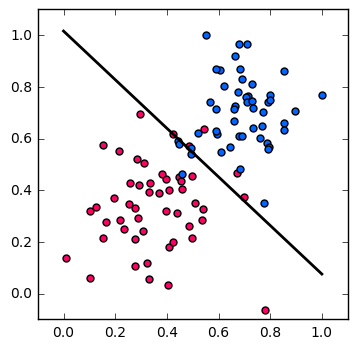

In [5]:
# load data
X,y = load_data('overlapping_2class.csv')

# run newtons method to minimize squared margin or SVM cost
w = newtons_method(X,y)

# plot everything - including data and separator
plot_all(X,y,w)